# Dataset 3: black_friday.csv

## Pengerjaan soal menggunakan distribusi normal karena pada percobaan yang ada terdiri dari belanja dan tidak belanja(sukses / gagal). Tiap pembelian bisa terdiri dari beberapa pembelian dengan jumlah uang yang sama

### import

In [14]:
import numpy as np
import pandas as pd
import math as math

### membaca file .csv

In [15]:
purchase = pd.read_csv('black_friday.csv', header = None)
purchase.columns = ['Purchase']
purchase.describe()

Purchase
count  537577.000000
mean     9333.859853
std      4981.022133
min       185.000000
25%      5866.000000
50%      8062.000000
75%     12073.000000
max     23961.000000

### visualisai histogram

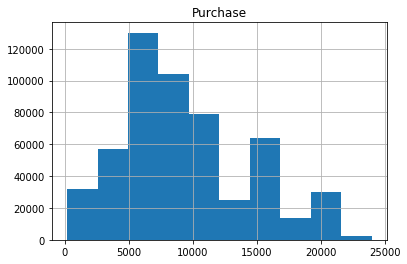

In [16]:
hist = purchase.hist()

### visualisai boxplot

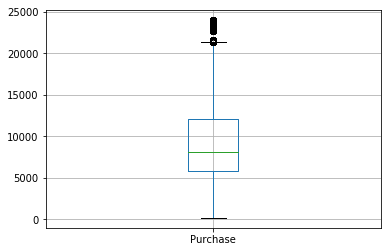

In [17]:
boxplot = purchase.boxplot()

### statistical descriptions

In [18]:
min = purchase.Purchase.min()
max = purchase.Purchase.max()
mean = purchase.Purchase.mean()
mode = purchase.Purchase.mode()
median = purchase.Purchase.median()
var = purchase.Purchase.var()
std = purchase.Purchase.std()
skew = purchase.Purchase.skew()
kurtosis = purchase.Purchase.kurtosis()
print("min = ", min)
print("max = ", max)
print("mean = ", mean)
print("mode = ", mode)
print("median = ", median)
print("var = ", var)
print("std = ", std)
print("skew = ", skew)
print("kurtosis = ", kurtosis)

min =  185
max =  23961
mean =  9333.859852635065
mode =  0    6855
dtype: int64
median =  8062.0
var =  24810581.486013696
std =  4981.022132656479
skew =  0.6242797316083074
kurtosis =  -0.34312137256836284


## Soal

### inisialisasi awal

In [19]:
black_friday = purchase
black_friday.columns = ['Purchase']

miskin = black_friday
kaya = black_friday
crazy_rich = black_friday
GF = black_friday
MIA = black_friday

### membuat black_friday menjadi data frame dengan kolom Purchase dan Total(jumlahnya)

In [20]:
black_friday = pd.DataFrame(black_friday.groupby(black_friday.Purchase).size())
black_friday.columns = ["Total"]
black_friday = black_friday.reset_index()

### membuat data frame berisi data miskin

In [21]:
miskin = pd.DataFrame(miskin[miskin.Purchase < 1000].groupby(miskin.Purchase).size())
miskin.columns = ["Total"]
miskin = miskin.reset_index()

### mencari peluang miskin

In [22]:
sum = black_friday.Total.sum()
prob = miskin.Total.sum()/sum

def ubah(x) :
    return 0.013103239163877919

peluang = (pd.DataFrame(miskin.Total))
peluang.columns = ['Peluang']
peluang["Peluang"] = peluang["Peluang"].apply(ubah)

print('peluang = ',prob)

peluang =  0.013103239163877919


### n = 250, untuk menghitung 250 orang baru

In [23]:
def combination(K) :
    return math.factorial(250)/(math.factorial(250-K)*math.factorial(K))
def binomial(m, P, X) :
        return m*((P)**X)*((1-P)**(250-X))

### data frame miskin untuk menghitung ekspektasi

In [24]:
probability_distribution = pd.concat([miskin.Purchase, peluang, miskin.Total], axis = 1, join_axes=[peluang.index])
probability_distribution.columns = ["Purchase",'Probability', 'Total']
probability_distribution["Combination"] = probability_distribution['Total'].apply(combination)
probability_distribution['Binomial'] = probability_distribution.apply(lambda x: binomial(x['Combination'], x['Probability'], x['Total']), axis=1)
probability_distribution["Expectation"] = probability_distribution.Binomial * probability_distribution.Total
Miskin = probability_distribution.head(250)
Miskin

Purchase  Probability  Total   Combination      Binomial   Expectation
0         185     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
1         186     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
2         187     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
3         188     0.013103      6  3.191954e+11  6.465904e-02  3.879542e-01
4         189     0.013103      2  3.112500e+04  2.028870e-01  4.057739e-01
5         190     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
6         191     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
7         192     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
8         193     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
9         194     0.013103      1  2.500000e+02  1.227377e-01  1.227377e-01
10        195     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
11        196     0.013103      1  2.500000e+02  1.227377e-01  1.227377e-01
12        197     0.013103      6  3.191954e+11  6.465904e-02  3.879542e-01
13        198     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
14        199     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
15        200     0.013103      2  3.112500e+04  2.028870e-01  4.057739e-01
16        201     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
17        202     0.013103      2  3.112500e+04  2.028870e-01  4.057739e-01
18        204     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
19        205     0.013103      2  3.112500e+04  2.028870e-01  4.057739e-01
20        206     0.013103      1  2.500000e+02  1.227377e-01  1.227377e-01
21        207     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
22        209     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
23        210     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
24        211     0.013103      1  2.500000e+02  1.227377e-01  1.227377e-01
25        212     0.013103      4  1.588828e+08  1.825725e-01  7.302901e-01
26        213     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
27        214     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
28        215     0.013103      3  2.573000e+06  2.226853e-01  6.680558e-01
29        216     0.013103      7  1.112624e+13  2.992457e-02  2.094720e-01
..        ...          ...    ...           ...           ...           ...
220       765     0.013103     63  1.137190e+60  2.396080e-60  1.509530e-58
221       766     0.013103     56  3.420851e+56  9.909551e-51  5.549348e-49
222       767     0.013103     58  3.874274e+57  1.978445e-53  1.147498e-51
223       768     0.013103     69  5.195525e+62  5.997075e-69  4.137981e-67
224       769     0.013103     63  1.137190e+60  2.396080e-60  1.509530e-58
225       770     0.013103     76  2.668451e+65  2.240360e-79  1.702674e-77
226       771     0.013103     60  4.013486e+58  3.613011e-56  2.167806e-54
227       772     0.013103     83  5.449349e+67  3.327759e-90  2.762040e-88
228       773     0.013103     51  5.285459e+53  3.710802e-44  1.892509e-42
229       774     0.013103     67  7.319222e+61  4.792489e-66  3.210967e-64
230       775     0.013103     79  2.911860e+66  5.722029e-84  4.520403e-82
231       776     0.013103     61  1.250102e+59  1.494170e-57  9.114436e-56
232       777     0.013103     62  3.810795e+59  6.047516e-59  3.749460e-57
233       778     0.013103      7  1.112624e+13  2.992457e-02  2.094720e-01
234       779     0.013103      9  9.087358e+15  4.308549e-03  3.877694e-02
235       780     0.013103     11  4.778298e+18  3.993746e-04  4.393121e-03
236       781     0.013103      9  9.087358e+15  4.308549e-03  3.877694e-02
237       782     0.013103      9  9.087358e+15  4.308549e-03  3.877694e-02
238       783     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
239       784     0.013103      5  7.817031e+09  1.192635e-01  5.963174e-01
240       785     0.013103     13  1.742302e+21  2.56

In [25]:
print("Ekespektasi miskin =", Miskin.Expectation.sum())

Ekespektasi miskin = 37.30936715343164


### membuat data frame berisi data kaya

In [26]:
kaya = pd.DataFrame(kaya[kaya.Purchase > 10000].groupby(kaya.Purchase).size())
kaya.columns = ["Total"]
kaya = kaya.reset_index()

### mencari peluang kaya

In [27]:
sum = black_friday.Total.sum()
prob = kaya.Total.sum()/sum

def ubah(x) :
    return 0.3472190960550768

peluang = (pd.DataFrame(kaya.Total))
peluang.columns = ['Peluang']
peluang["Peluang"] = peluang["Peluang"].apply(ubah)

### data frame kaya untuk menghitung ekspektasi

In [28]:
probability_distribution = pd.concat([kaya.Purchase, peluang, kaya.Total], axis = 1, join_axes=[peluang.index])
probability_distribution.columns = ["Purchase",'Probability', 'Total']
probability_distribution["Combination"] = probability_distribution['Total'].apply(combination)
probability_distribution['Binomial'] = probability_distribution.apply(lambda x: binomial(x['Combination'], x['Probability'], x['Total']), axis=1)
probability_distribution["Expectation"] = probability_distribution.Binomial * probability_distribution.Total
Kaya = probability_distribution.head(250)
Kaya

Purchase  Probability  Total   Combination      Binomial   Expectation
0       10001     0.347219     97  1.675092e+71  2.098972e-02  2.036002e+00
1       10002     0.347219     90  4.615241e+69  4.800751e-02  4.320676e+00
2       10003     0.347219     80  6.224102e+66  3.571329e-02  2.857063e+00
3       10004     0.347219     85  2.115782e+68  5.168981e-02  4.393634e+00
4       10005     0.347219     81  1.306293e+67  3.986850e-02  3.229349e+00
5       10006     0.347219     89  2.579948e+69  5.045331e-02  4.490344e+00
6       10007     0.347219     91  8.114709e+69  4.489768e-02  4.085689e+00
7       10008     0.347219     87  7.652107e+68  5.289168e-02  4.601576e+00
8       10009     0.347219    101  9.004492e+71  9.031748e-03  9.122065e-01
9       10010     0.347219     73  2.064628e+64  9.834263e-03  7.179012e-01
10      10011     0.347219     95  6.534753e+70  2.894175e-02  2.749466e+00
11      10012     0.347219    103  1.890035e+72  5.363579e-03  5.524487e-01
12      10013     0.347219     98  2.615194e+71  1.743043e-02  1.708182e+00
13      10014     0.347219     97  1.675092e+71  2.098972e-02  2.036002e+00
14      10015     0.347219     85  2.115782e+68  5.168981e-02  4.393634e+00
15      10016     0.347219    104  2.671492e+72  4.032504e-03  4.193805e-01
16      10017     0.347219     85  2.115782e+68  5.168981e-02  4.393634e+00
17      10018     0.347219     98  2.615194e+71  1.743043e-02  1.708182e+00
18      10019     0.347219     85  2.115782e+68  5.168981e-02  4.393634e+00
19      10020     0.347219    103  1.890035e+72  5.363579e-03  5.524487e-01
20      10021     0.347219     78  1.337424e+66  2.712377e-02  2.115654e+00
21      10022     0.347219     94  3.979497e+70  3.313505e-02  3.114695e+00
22      10023     0.347219     75  1.158870e+65  1.561734e-02  1.171301e+00
23      10024     0.347219    110  1.512024e+73  5.168884e-04  5.685772e-02
24      10025     0.347219     86  4.059350e+68  5.275051e-02  4.536543e+00
25      10026     0.347219     82  2.692238e+67  4.370579e-02  3.583875e+00
26      10027     0.347219     82  2.692238e+67  4.370579e-02  3.583875e+00
27      10028     0.347219     85  2.115782e+68  5.168981e-02  4.393634e+00
28      10029     0.347219     90  4.615241e+69  4.800751e-02  4.320676e+00
29      10030     0.347219     95  6.534753e+70  2.894175e-02  2.749466e+00
..        ...          ...    ...           ...           ...           ...
220     10386     0.347219      3  2.573000e+06  1.904621e-41  5.713863e-41
221     10387     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
222     10392     0.347219      2  3.112500e+04  4.331537e-43  8.663074e-43
223     10393     0.347219      2  3.112500e+04  4.331537e-43  8.663074e-43
224     10394     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
225     10395     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
226     10399     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
227     10400     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
228     10401     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
229     10406     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
230     10407     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
231     10408     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
232     10410     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
233     10415     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
234     10419     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
235     10420     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
236     10424     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
237     10425     0.347219      3  2.573000e+06  1.904621e-41  5.713863e-41
238     10429     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
239     10431     0.347219      1  2.500000e+02  6.540885e-45  6.540885e-45
240     10432     0.347219      2  3.112500e+04  4.33

In [29]:
print("Ekespektasi kaya =", Kaya.Expectation.sum())

Ekespektasi kaya = 243.69313598135122


### membuat data frame berisi data crazy_rich


In [30]:
crazy_rich = pd.DataFrame(crazy_rich[crazy_rich.Purchase > 20000].groupby(crazy_rich.Purchase).size())
crazy_rich.columns = ["Total"]
crazy_rich = crazy_rich.reset_index()

### menghitung peluang crazy_rich

In [31]:
sum = black_friday.Total.sum()
prob = crazy_rich.Total.sum()/sum

def ubah(x) :
    return 0.023280385879604223

peluang = (pd.DataFrame(crazy_rich.Total))
peluang.columns = ['Peluang']
peluang["Peluang"] = peluang["Peluang"].apply(ubah)

print('peluang = ',prob)

peluang =  0.023280385879604223


### data frame crazy rich untuk menghitung ekspektasi

In [32]:
probability_distribution = pd.concat([crazy_rich.Purchase, peluang, crazy_rich.Total], axis = 1, join_axes=[peluang.index])
probability_distribution.columns = ["Purchase",'Probability', 'Total']
probability_distribution["Combination"] = probability_distribution['Total'].apply(combination)
probability_distribution['Binomial'] = probability_distribution.apply(lambda x: binomial(x['Combination'], x['Probability'], x['Total']), axis=1)
probability_distribution["Expectation"] = probability_distribution.Binomial * probability_distribution.Total
Crazy_rich = probability_distribution.head(250)
Crazy_rich

Purchase  Probability  Total   Combination  Binomial  Expectation
0       20001      0.02328      8  3.379596e+14  0.097522     0.780179
1       20002      0.02328      6  3.191954e+11  0.162127     0.972762
2       20003      0.02328      3  2.573000e+06  0.096511     0.289534
3       20004      0.02328      6  3.191954e+11  0.162127     0.972762
4       20005      0.02328      6  3.191954e+11  0.162127     0.972762
5       20006      0.02328      6  3.191954e+11  0.162127     0.972762
6       20007      0.02328     10  2.190053e+17  0.035903     0.359033
7       20008      0.02328      7  1.112624e+13  0.134700     0.942900
8       20009      0.02328      6  3.191954e+11  0.162127     0.972762
9       20010      0.02328      9  9.087358e+15  0.062502     0.562522
10      20011      0.02328     11  4.778298e+18  0.018671     0.205384
11      20012      0.02328     11  4.778298e+18  0.018671     0.205384
12      20013      0.02328     15  4.640497e+23  0.000585     0.008779
13      20014      0.02328      9  9.087358e+15  0.062502     0.562522
14      20015      0.02328     11  4.778298e+18  0.018671     0.205384
15      20016      0.02328      7  1.112624e+13  0.134700     0.942900
16      20017      0.02328      6  3.191954e+11  0.162127     0.972762
17      20018      0.02328      3  2.573000e+06  0.096511     0.289534
18      20019      0.02328      4  1.588828e+08  0.142048     0.568192
19      20020      0.02328      9  9.087358e+15  0.062502     0.562522
20      20021      0.02328      4  1.588828e+08  0.142048     0.568192
21      20022      0.02328     10  2.190053e+17  0.035903     0.359033
22      20023      0.02328      8  3.379596e+14  0.097522     0.780179
23      20024      0.02328      8  3.379596e+14  0.097522     0.780179
24      20025      0.02328     15  4.640497e+23  0.000585     0.008779
25      20026      0.02328      7  1.112624e+13  0.134700     0.942900
26      20027      0.02328     12  9.516776e+19  0.008864     0.106363
27      20028      0.02328     10  2.190053e+17  0.035903     0.359033
28      20029      0.02328      9  9.087358e+15  0.062502     0.562522
29      20030      0.02328      5  7.817031e+09  0.166579     0.832895
..        ...          ...    ...           ...       ...          ...
220     20221      0.02328     10  2.190053e+17  0.035903     0.359033
221     20222      0.02328     10  2.190053e+17  0.035903     0.359033
222     20223      0.02328     10  2.190053e+17  0.035903     0.359033
223     20224      0.02328     10  2.190053e+17  0.035903     0.359033
224     20225      0.02328      9  9.087358e+15  0.062502     0.562522
225     20226      0.02328     12  9.516776e+19  0.008864     0.106363
226     20227      0.02328     13  1.742302e+21  0.003868     0.050281
227     20228      0.02328      3  2.573000e+06  0.096511     0.289534
228     20229      0.02328     13  1.742302e+21  0.003868     0.050281
229     20230      0.02328     13  1.742302e+21  0.003868     0.050281
230     20231      0.02328     10  2.190053e+17  0.035903     0.359033
231     20232      0.02328     12  9.516776e+19  0.008864     0.106363
232     20233      0.02328     12  9.516776e+19  0.008864     0.106363
233     20234      0.02328      9  9.087358e+15  0.062502     0.562522
234     20235      0.02328     12  9.516776e+19  0.008864     0.106363
235     20236      0.02328     12  9.516776e+19  0.008864     0.106363
236     20237      0.02328     14  2.949469e+22  0.001561     0.021849
237     20238      0.02328      9  9.087358e+15  0.062502     0.562522
238     20239      0.02328     11  4.778298e+18  0.018671     0.205384
239     20240      0.02328      7  1.112624e+13  0.134700     0.942900
240     20241      0.02328     12  9.516776e+19  0.008864     0.106363
241     20242      0.02328     11  4.778298e+18  0.018671     0.205384
242     20243      0.02328     11  4.778298e+18  0.018671     0.205384
243     20244      0.02328      9  9.087358e+15  0.062502     0.562522
244     20245      0.02328   

In [33]:
print("Ekespektasi crazy rich =", Crazy_rich.Expectation.sum())

Ekespektasi crazy rich = 125.57317738549634


### membuat data frame berisi data pembelian Galaxy Fold

In [34]:
GF = pd.DataFrame(GF[(GF.Purchase >= 1980) & (GF.Purchase <= 2000)].groupby(GF.Purchase).size())
GF.columns = ["Total"]
GF = GF.reset_index()

### menghitung peluang pembelian Galaxy Fold

In [35]:
sum = black_friday.Total.sum()
prob = GF.Total.sum()/sum

def ubah(x) :
    return 0.0012351718916545908

peluang = (pd.DataFrame(GF.Total))
peluang.columns = ['Peluang']
peluang["Peluang"] = peluang["Peluang"].apply(ubah)

print('peluang = ',prob)


peluang =  0.0012351718916545908


### n = 1000, untuk menghitung 1000 pembeli baru

In [36]:
def combination(K) :
    return math.factorial(1000)/(math.factorial(1000-K)*math.factorial(K))
def binomial(m, P, X) :
        return m*((P)**X)*((1-P)**(1000-X))

### data frame pembelian Galaxy Fold untuk menghitung ekspektasi

In [37]:
probability_distribution = pd.concat([GF.Purchase, peluang, GF.Total], axis = 1, join_axes=[peluang.index])
probability_distribution.columns = ["Purchase",'Probability', 'Total']
probability_distribution["Combination"] = probability_distribution['Total'].apply(combination)
probability_distribution['Binomial'] = probability_distribution.apply(lambda x: binomial(x['Combination'], x['Probability'], x['Total']), axis=1)
probability_distribution["Expectation"] = probability_distribution.Binomial * probability_distribution.Total
Galaxy_Fold = probability_distribution
Galaxy_Fold

Purchase  Probability  Total   Combination      Binomial   Expectation
0       1980     0.001235     34  1.920565e+63  7.649809e-37  2.600935e-35
1       1981     0.001235     34  1.920565e+63  7.649809e-37  2.600935e-35
2       1982     0.001235     22  7.049926e+44  2.193998e-20  4.826795e-19
3       1983     0.001235     28  2.239598e+54  2.493484e-28  6.981755e-27
4       1984     0.001235     40  5.559744e+71  7.922483e-46  3.168993e-44
5       1985     0.001235     36  1.420898e+66  8.655912e-40  3.116128e-38
6       1986     0.001235     41  1.301794e+73  2.294103e-47  9.405821e-46
7       1987     0.001235     30  2.429608e+57  4.137149e-31  1.241145e-29
8       1988     0.001235     29  7.506513e+55  1.033568e-29  2.997347e-28
9       1989     0.001235     30  2.429608e+57  4.137149e-31  1.241145e-29
10      1990     0.001235     32  2.302078e+60  5.995333e-34  1.918507e-32
11      1991     0.001235     31  7.602322e+58  1.600941e-32  4.962917e-31
12      1992     0.001235     20  3.394828e+41  6.907821e-18  1.381564e-16
13      1993     0.001235     34  1.920565e+63  7.649809e-37  2.600935e-35
14      1994     0.001235     34  1.920565e+63  7.649809e-37  2.600935e-35
15      1995     0.001235     28  2.239598e+54  2.493484e-28  6.981755e-27
16      1996     0.001235     33  6.752763e+61  2.174898e-35  7.177163e-34
17      1997     0.001235     19  6.921158e+39  1.138775e-16  2.163672e-15
18      1998     0.001235     35  5.300760e+64  2.611102e-38  9.138857e-37
19      1999     0.001235     32  2.302078e+60  5.995333e-34  1.918507e-32
20      2000     0.001235     42  2.972429e+74  6.478080e-49  2.720794e-47

In [38]:
print("Ekespektasi pembelian Galaxy Fold =", probability_distribution.Expectation.sum())

Ekespektasi pembelian Galaxy Fold = 2.302311564431878e-15


### data frame pembelian MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 

In [39]:
MIA = pd.DataFrame(MIA[(MIA.Purchase >= 2707) & (MIA.Purchase <= 2897)].groupby(MIA.Purchase).size())
MIA.columns = ["Total"]
MIA = MIA.reset_index()

### menghitung peluang pembelian MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 

In [40]:
sum = black_friday.Total.sum()
prob = MIA.Total.sum()/sum

def ubah(x) :
    return 0.007174786123662284

peluang = (pd.DataFrame(MIA.Total))
peluang.columns = ['Peluang']
peluang["Peluang"] = peluang["Peluang"].apply(ubah)

print('peluang = ',prob)

peluang =  0.007174786123662284


### data frame pembelian MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 untuk menghitung ekspektasi

In [41]:
probability_distribution = pd.concat([MIA.Purchase, peluang, MIA.Total], axis = 1, join_axes=[peluang.index])
probability_distribution.columns = ["Purchase",'Probability', 'Total']
probability_distribution["Combination"] = probability_distribution['Total'].apply(combination)
probability_distribution['Binomial'] = probability_distribution.apply(lambda x: binomial(x['Combination'], x['Probability'], x['Total']), axis=1)
probability_distribution["Expectation"] = probability_distribution.Binomial * probability_distribution.Total
probability_distribution

Purchase  Probability  Total   Combination      Binomial   Expectation
0        2707     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
1        2708     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
2        2710     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
3        2711     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
4        2712     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
5        2713     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
6        2715     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
7        2716     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
8        2717     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
9        2718     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
10       2719     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
11       2721     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
12       2722     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
13       2723     0.007175      4  4.141712e+10  8.427963e-02  3.371185e-01
14       2724     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
15       2725     0.007175      4  4.141712e+10  8.427963e-02  3.371185e-01
16       2726     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
17       2727     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
18       2729     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
19       2730     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
20       2731     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
21       2733     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
22       2734     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
23       2735     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
24       2736     0.007175     30  2.429608e+57  1.062721e-10  3.188162e-09
25       2737     0.007175     25  4.764186e+49  1.057282e-07  2.643205e-06
26       2738     0.007175     24  1.220335e+48  3.747527e-07  8.994066e-06
27       2739     0.007175     25  4.764186e+49  1.057282e-07  2.643205e-06
28       2740     0.007175     24  1.220335e+48  3.747527e-07  8.994066e-06
29       2741     0.007175     34  1.920565e+63  2.291166e-13  7.789964e-12
..        ...          ...    ...           ...           ...           ...
153      2865     0.007175     24  1.220335e+48  3.747527e-07  8.994066e-06
154      2866     0.007175     24  1.220335e+48  3.747527e-07  8.994066e-06
155      2867     0.007175     19  6.921158e+39  1.078360e-04  2.048884e-03
156      2868     0.007175     23  2.997751e+46  1.273871e-06  2.929902e-05
157      2869     0.007175     34  1.920565e+63  2.291166e-13  7.789964e-12
158      2870     0.007175     24  1.220335e+48  3.747527e-07  8.994066e-06
159      2871     0.007175     33  6.752763e+61  1.114738e-12  3.678636e-11
160      2872     0.007175     35  5.300760e+64  4.569849e-14  1.599447e-12
161      2873     0.007175      5  8.250291e+12  1.213244e-01  6.066219e-01
162      2874     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
163      2875     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
164      2876     0.007175      2  4.995000e+05  1.946282e-02  3.892565e-02
165      2877     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
166      2878     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
167      2880     0.007175      4  4.141712e+10  8.427963e-02  3.371185e-01
168      2881     0.007175      3  1.661670e+08  4.678981e-02  1.403694e-01
169      2882     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
170      2884     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
171      2885     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
172      2886     0.007175      1  1.000000e+03  5.391805e-03  5.391805e-03
173      2888     0.007175      2  4.995000e+05  1.94

In [42]:
print("Ekspektasi pembelian MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 =", probability_distribution.Expectation.sum())

Ekspektasi pembelian MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 = 4.438141168728103
